**CHAPTER3 - PAC-BAYESIAN BOUNDS FOR ONLINE LEARNING**

**Notations**

Fix $f_1,\dots,f_M$ and as in Chapter 2, $f(\cdot)=(f_1(\cdot),\dots,f_M(\cdot))$. We will possibly consider all types of aggregation (MS, C and L). Let $[(x_t,y_t)]_{t\in\mathbb{N}^*}$ be any sequence in $(\mathcal{X}\times[-B_y,B_y])^{\mathbb{N}^*}$. We don't have to know exactly the range of $y$, but we have to know an upper bound: $B>0$ such that $B_y\leq B$. In this case, for any $\alpha\in\mathbb{R}^M$ it makes sense to define the predictor $f_{\alpha}(\cdot) = [\left<\alpha,f(\cdot)\right>]_B $ where $[u]_B$ is $-B$ if $u\leq -B$, $B$ if $u\geq B$ and $u$ otherwise (clip function). We put $\mathcal{F}=\{f_\alpha,\alpha\in\mathbb{R}^M\}$. Finally, any loss function $\ell$ such that $\forall t$, $\ell(y_t,\cdot)$ is a convex function.

**Exponentially Weighted Aggregation (EWA)**

Initialization: fix $p_1 = \pi$ an arbitrary probability distribution on $\mathbb{R}^M$ (equiped with the Borel $\sigma$-algebra) and let $\eta>0$.

Step $t$: $\hat{y}_t=\int f_\theta (x_t) p_t({\rm d})\theta$ and once $y_t$ is revealed,
$$ p_{t+1}({\rm d}\theta) = \frac{
\exp\left(-\eta \ell(y_t,f_\theta (x_t)) \right) p_{t}({\rm d}\theta)
}{
\int_{\mathbb{R}^M} \exp\left(-\eta \ell(y_t,f_\alpha (x_t)) \right) p_{t}({\rm d}\alpha)
}. $$

_Remark_: by recurrence we also have
$$ p_t({\rm d}\theta) = \frac{\exp\left(-\eta \sum_{i=1}^{t-1}\ell(y_i,f_\theta (x_i)) \right) \pi({\rm d}\theta) }
{\int \exp\left(-\eta \sum_{i=1}^{t-1}\ell(y_i,f_\alpha (x_i)) \right) \pi({\rm d}\alpha)} =
 \frac{\exp\left(-\eta \sum_{i=1}^{t-1}\ell(y_i,f_\theta (x_i)) \right) \pi({\rm d}\theta) }
{W_t}  $$
where we introduce the notation $W_t$ for short.

_Remark 2_: in the case where the support of $\pi$ is finite, the implementation of this method is trivial, we only have to update a finite number of weights at each step. However, in the general case, the implementation of EWA  is far from trivial, we will discuss this point in Chapter 5.

**Theoretical analysis of EWA**

A reminder: the Kullback-Leibler divergence between two probability measures $\mathcal{K}(\mu,\nu)=\int \log\left( \frac{{\rm d}\mu}{{\rm d}\nu}(\theta)\right)\mu({\rm d}\theta) $ if $\mu\ll\nu$ and $\mathcal{K}(\mu,\nu)=+\infty$ otherwise. Note that this it does not satisfy the definition of a distance, however we have $\mathcal{K}(\mu,\nu)\Leftrightarrow \mu=\nu$ and $\mathcal{K}(\mu,\nu)\geq 4\|\mu-\nu\|_{{\rm TV}}^2 $ (Pinsker's inequality).

_Theorem_:

1) Assume that $\forall t$, $\forall u\in[-B,B]$, $\ell(y_t,u)\leq C$  (bounded loss function). Then for any $T\geq 1$,
$$
L_T \leq \inf_{\rho}\left\{ \int \sum_{t=1}^T \ell(y_t,f_{\theta}(x_t)) \rho({\rm d}\theta)
       + \frac{C^2 T\eta}{8} + \frac{\mathcal{K}(\rho,\pi)}{\eta} \right\}
$$
where the infimum is over all probability measures $\rho$.

2) Under the same assumption (bounded loss function),
$$
L_T \leq \frac{C\eta}{1-\exp(-C\eta)} \inf_{\rho}\left\{ \int \sum_{t=1}^T \ell(y_t,f_{\theta}(x_t)) \rho({\rm d}\theta)
       + \frac{\mathcal{K}(\rho,\pi)}{\eta} \right\}.
$$

3) Finally, assume that $\eta$ and $\ell$ are such that $\forall t$, $\eta \ell(y_t,\cdot)$ is exp-convex on $[-B,B]$ (that means that $\exp(-\ell(y_t,\cdot))$ is concave. Then:
$$
L_T \leq \inf_{\rho}\left\{ \int \sum_{t=1}^T \ell(y_t,f_{\theta}(x_t)) \rho({\rm d}\theta)
       + \frac{\mathcal{K}(\rho,\pi)}{\eta} \right\}.
$$

Comments are in order! First: in 1) and 2) there is no restriction on $\eta$. However, 3) requires a stringent assumption that usually implies restriction on $\eta$. For example, simple calculus shows that when $\ell(y,u)=|y-u|$, the exp-convexity assumption is never satisfied while, when $\ell(y,u)=(y-u)^2$ it is satisfied iff $\eta \leq \frac{1}{8B^2} $. Then, in order to understand the full power of these results, we provide a few simple applications. The proof is given at the end of the chapter.

**MS-type aggregation**

In this case, we are only interested in the predictors $f_1$ to $f_M$. So, let us introduce the canonical basis of $\mathbb{R}^M$, say $e_1,\dots,e_M$ and take $\pi$ as uniform on the set $\{e_1,\dots,e_M\}$. Then, for any $i\in\{1,\dots,M\}$, setting $\rho=\delta_{e_i}$ leads to $\mathcal{K}(\rho,\pi)=\log(M)$ and $ \int \sum_{t=1}^T \ell(y_t,f_{\theta}(x_t)) \rho({\rm d}\theta) =  \sum_{t=1}^T \ell(y_t,f_{i}(x_t))$. So 1) leads to:
$$
L_T \leq \inf_{1\leq i\leq M} \sum_{t=1}^T \ell(y_t,f_{i}(x_t) + \frac{C^2 T\eta}{8} + \frac{\log(M)}{\eta}
$$
and taking $\eta=2\sqrt{\frac{2\log(M)}{T C^2}}$ leads to a regret in
$$
\mathcal{R}_T(\{f_1,\dots,f_M\}) \leq C \sqrt{\frac{T \log(M)}{2}}.
$$
So the regret is in $\sqrt{T\log(M)}$. This is a nice result. However, in Chapter 1, in the realizable case, we obtained with the halving algorithm a regret that does not depend on $T$. We can here mimic this, using 2). Actually, in the realizable case, 2) leads to
$$
L_T \leq  \frac{C\eta}{1-\exp(-C\eta)} \left\{  \underbrace{\inf_{1\leq i\leq M} \sum_{t=1}^T \ell(y_t,f_{i}(x_t)}_{=0}
       + \frac{\log(M)}{\eta} \right\}
$$
and set, for example, $\eta=\frac{1}{C}$ to get:
$$
L_T \leq  \frac{C\log(M)}{1-\frac{1}{{\rm e}}}
$$
that is, a regret that does not depend on $T$. However, note that in the general case, 2) is seen as quite weak as it does not lead to a bound on the regret - that's because $\frac{C\eta}{1-\exp(-C\eta)}>1$. Finally, _if we work with the squared loss_, 3) with $\eta=\frac{1}{8B^2}$ leads to
$$
\mathcal{R}_T(\{f_1,\dots,f_M\}) \leq 8B^2 \log(M).
$$
So, the result provided by 3) is much stronger than the one provided by 1) and 2), but, once again, it requires stronger assumptions.

Finally, note that using the quadratic loss the online-to-batch trick of the previous chapter, we can define $\hat{f}(\cdot)= \frac{1}{n}\sum_{i=1}^n \int f_{\theta}(\cdot) p_t({\rm d}\theta) $ and this leads to:
$$ \mathbb{E}[R(\hat{f})] \leq \inf_{1\leq i\leq M} R(f_i) + \frac{8B^2\log(M)}{n}. $$
The estimator $\hat{f}$ is known under the name progressive mixture rule. It is known that the rate $\log(M)/n$ cannot be improved in this case.

We now illustrate the performance of the online EWA on the same example as in Chapter 1. Remind the setting: $\mathcal{X}=\{0,\dots,N-1\}$, $\mathcal{F}=(f_0,\dots,f_{M-1})$ where the $f_i$ will be drawn i.i.d from the set of all functions $\{0,\dots,N-1\}\rightarrow\{-1,+1\}$. We consider the absolute loss $\ell(u,v)=|u-v|$. However, this time, we do not consider the realizable case: a function $i_0$ is chosen randomly, but then for all $t$, $y_t = f_{i_0}(x_t)$ with probability $1-p$ and $y_t = - f_{i_0}(x_t)$ with probability $p$, you can choose $p$ as you want between $0$ and $0.5$.

In [30]:
N = 1000 #20
M = 500
T = 500
p = 0.1
eta = 10

We compare EWA to a random guess, and to the function $f_{i_0}$ (which is not available in practice).

In [43]:
def loss(y_true,y_pred):
    if y_true==y_pred:
        return 0
    else:
        return 1
def loss2(y_true,y_pred):
    return (y_true-y_pred)**2

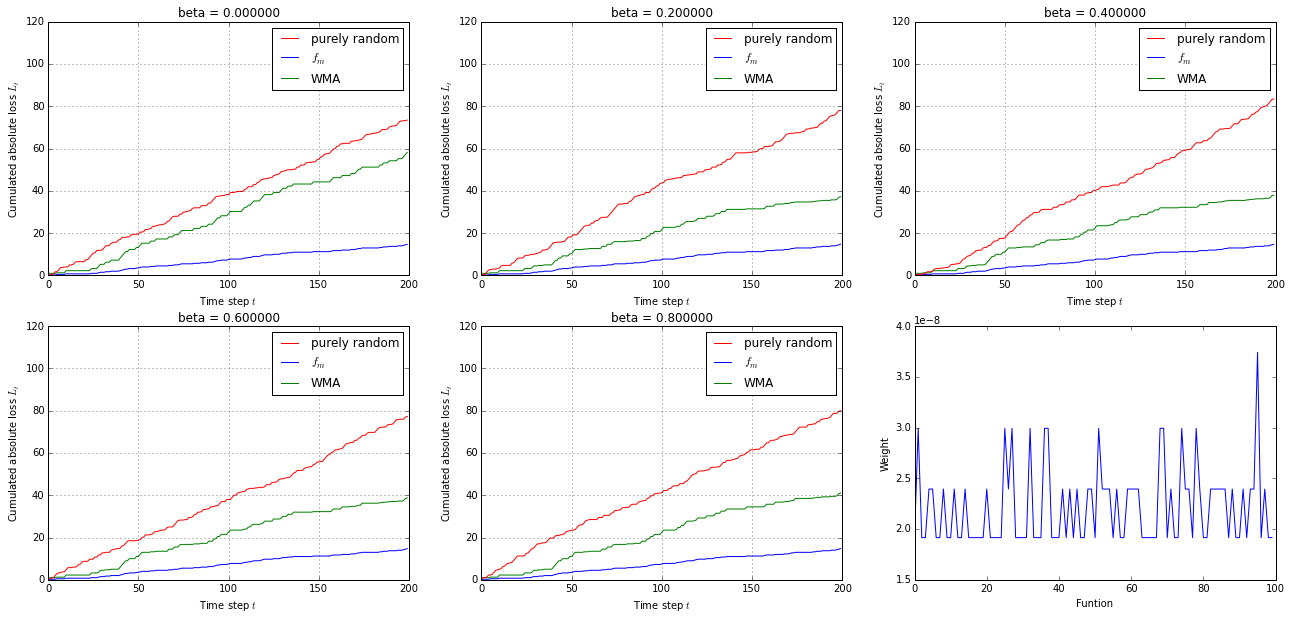

In [111]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 300
T = 200
x = floor(rand(T)*N).astype(int)
# x = arange(T)
M = 100
alpha = 0.5
f = ones([N,M])
y = ones(N)
y[:M-1] = 0
y = y[x]
for i in range(M):
    f[:i,i] = alpha
    f[i,i] = 0
fig = plt.figure(figsize=(22,10))
for i_beta,beta in enumerate([0,0.2,0.4,0.6,0.8]):

    pure_rand,fiO,WMA = [],[],[]
    w_wma = repeat(1.0/M,M)
    for t in range(T):
        pred = f[x[t],:]
        # Majority vote
        pos_ind, zero_ind, alpha_ind = (pred  == 1), (pred  == 0), (pred  == alpha)
        sum_weights = zeros(3)
        sum_weights[0] = np.sum (w_wma[pos_ind])
        sum_weights[1] = np.sum (w_wma[zero_ind])
        sum_weights[2] = np.sum (w_wma[alpha_ind])
        outputs = [1,0,alpha]
        output = outputs[argmax(sum_weights)]
        
        list.append(WMA,loss2(y[t],output))
        list.append(fiO,loss2(y[t],pred[M-1]))
        list.append(pure_rand,loss2(y[t],outputs[randint(0,3)]))
        #Update weigth if mistake
        if y[t]!=output:
            for i in range(M):
                if pred[i]!=y[t]:
                    w_wma[i] =  w_wma[i]*beta
        
#     pure_rand = cumsum(array([outputs[randint(0,3)] for i in range(T)]))
    pure_rand = cumsum(pure_rand)
    fiO = cumsum(fiO)
    WMA = cumsum(WMA)
    
    plt.subplot(2, 3, i_beta+1)
    plt.ylim(0,T*0.6)
    l3, = plt.plot(fiO)
    l4, = plt.plot(WMA)
    l2, = plt.plot(pure_rand)
    plt.legend([l2,l3,l4],['purely random','$f_m$','WMA'],loc='best')
    plt.grid(True,which="both")
    plt.xlabel(r"Time step $t$")
    plt.ylabel(r"Cumulated absolute loss $L_t$")
    plt.title ('beta = %f' %beta)

plt.subplot(2, 3, 6)
plt.plot(w_wma) 
plt.xlabel("Funtion")
plt.ylabel("Weight")
plt.show()

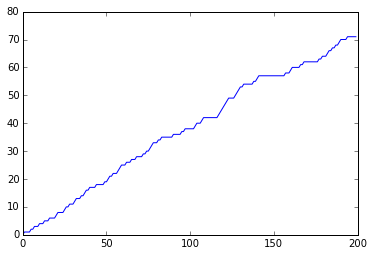

In [107]:

plt.plot(fiO)

/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:44: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


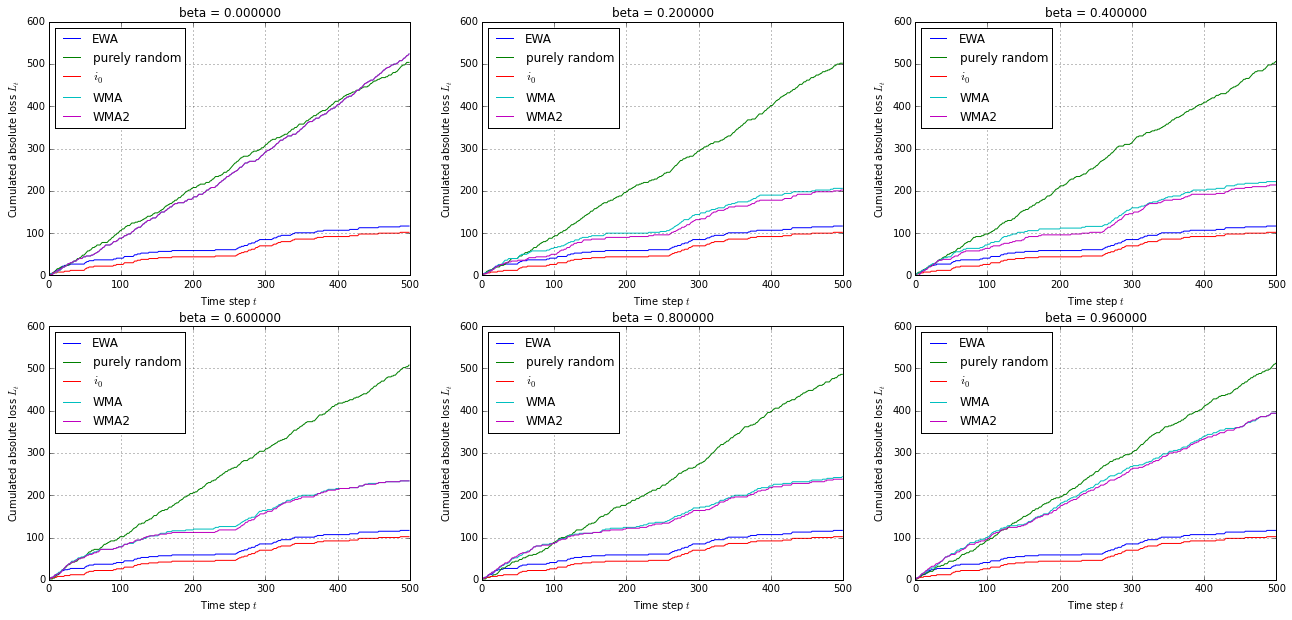

In [62]:
from pylab import *
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

x = floor(rand(T)*N)
f = sign(randn(M,N))
iO = floor(rand()*M)
y = f[iO,[x]][0]*((rand(T)>p)-0.5)*2

# beta = 0.5

fig = plt.figure(figsize=(22,10))
for i_beta,beta in enumerate([0,0.2,0.4,0.6,0.8,0.96]):

    pure_rand,EWA,fiO,WMA,WMA1 = [],[],[],[],[]
    w = repeat(1.0/M,M)
    w_wma = repeat(1.0/M,M)
    w_wma1 = random.normal(loc=0.5,scale=0.1,size=M)
    w_wma1 = w_wma1/sum(w_wma1)
    for t in range(T):
        pred = f[:,x[t]]
        # Majority vote
        pos_ind, neg_ind = (pred  == 1), (pred  == -1)
        pos_sum, neg_sum = np.sum (w_wma[pos_ind]), np.sum (w_wma[neg_ind])
        output = (1 if pos_sum > neg_sum else -1)
#         list.append(WMA,abs(y[t]-output))
        list.append(WMA,loss(y[t],output))
        #Update weigth if mistake
        if y[t]!=output:
            for i in range(M):
                if pred[i]!=y[t]:
                    w_wma[i] =  w_wma[i]*beta
        # Majority vote
        pos_sum, neg_sum = np.sum (w_wma1[pos_ind]), np.sum (w_wma1[neg_ind])
        output1 = (1 if pos_sum > neg_sum else -1)
        list.append(WMA1,abs(y[t]-output1))
        list.append(WMA1,loss(y[t],output1))
        #Update weigth if mistake
        if y[t]!=output1:
            for i in range(M):
                if pred[i]!=y[t]:
                    w_wma1[i] =  w_wma1[i]*beta
        error = abs(y[t]-pred)
        list.append(EWA,abs(y[t]-sum(w*pred)))
        list.append(fiO,abs(y[t]-pred[iO]))
        w = w*exp(-eta*error)
        w = w/sum(w)

    pure_rand = cumsum((sign(randn(T))+1))
    EWA = cumsum(EWA)
    fiO = cumsum(fiO)
    WMA = cumsum(WMA)
    WMA1 = cumsum(WMA1)
    
#     ax = fig.add_subplot(111)
    plt.subplot(2, 3, i_beta+1)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.ylim(0,1.2*T)
    l1, = plt.plot(EWA)
    l2, = plt.plot(pure_rand)
    l3, = plt.plot(fiO)
    l4, = plt.plot(WMA)
    l5, = plt.plot(WMA1)
    plt.legend([l1,l2,l3,l4,l5],['EWA','purely random','$i_0$','WMA','WMA2'],loc='best')
#     plt.legend([l4,l5],['Equal weight','gaussian'],loc='best')
    plt.grid(True,which="both")
    plt.xlabel(r"Time step $t$")
    plt.ylabel(r"Cumulated absolute loss $L_t$")
    plt.title ('beta = %f' %beta)
    
plt.show()

**L-type aggregation (with quadratic loss)**

Define $\pi=\mathcal{N}(0,\sigma^2 I_M)$. Then, for $\rho=\mathcal{N}(\theta_0,S^2 I_M)$, calculations show that
$$
\mathcal{K}(\rho,\pi) = \frac{1}{2}\left\{M\left[\frac{S^2}{\sigma^2}-1+\log\left(\frac{\sigma^2}{S^2}\right) \right]+\frac{\|\theta_0\|^2}{\sigma^2}\right\}.
$$
Then, if we assume that $\|f_i\|_\infty \leq C_f$ for any $i$, then we also can get the upper bound:
$$
\int \sum_{t=1}^T (y_t - f_\theta (x_t))^2 \rho({\rm d}\theta) \leq \sum_{t=1}^T (y_t - f_{\theta_0} (x_t))^2 + T M^2 S^2 C_f^2.
$$
Plugging this in 3), putting $S^2 = \frac{1}{TM^2}$, $\sigma^2=1$, and taking $\eta=\frac{1}{8B^2}$, and few rough upper bounds lead to:
$$
L_T \leq \inf_{\theta_0 \in \mathbb{R}^M }\left\{
 \sum_{t=1}^T (y_t - f_{\theta_0} (x_t))^2 + 4B^2 M \log\left( \frac{TM \sigma^2}{{\rm e}}\right) + C_f^2 + \frac{1+\|\theta_0\|^2}{\sigma^2}
\right\}
$$
or to a regret bound on a ball with radius $r$:
$$
\mathcal{R}_T(\{f_{\theta}\in\mathcal{F},\|\theta\|\leq r\}) \leq
4B^2 M \log\left( \frac{TM \sigma^2}{{\rm e}}\right) + C_f^2 + \frac{1+r^2}{\sigma^2}.
$$
Note that the dependence in $r$ can be improved using a heavy-tailed distribution for $\pi$; the dependence in $M$ and $T$ cannot be improved.

**Proof of the theorem**

_Lemma_: for any bounded function $h$ define $\pi_h$ by $\pi_h({\rm d}\theta) = \frac{\exp[h(\theta)]\pi({\rm d}\theta)}
   {\int \exp[h(\alpha)]\pi({\rm d}\alpha)}$. Then:
$$ \sup_{\rho}\left[\int h{\rm d}\rho - \mathcal{K}(\rho,\pi)\right] = \log \int \exp[h(\theta)] \pi({\rm d}\theta) $$
and the infimum is reached for $\rho=\pi_h$.

_Proof of the lemma_: calculate $\mathcal{K}(\rho,\pi_h)$ and use the fact that this is minimal, and null, for $\rho=\pi_h$.

_Proof of the theorem_: the proof of 1), 2) and 3) rely on the same idea: first, we upper bound
$$ \prod_{t=1}^T \int \exp\left(-\eta \ell(y_t,f_{\theta}(x_t))\right) p_t({\rm d}\theta)$$
in terms of
$$ \prod_{t=1}^T  \exp\left(-\eta \int \ell(y_t,f_{\theta}(x_t)) p_t({\rm d}\theta) \right). $$
More precisely, we seek for a one-to-one function $F$ such that
$$
 \prod_{t=1}^T \int \exp\left(-\eta \ell(y_t,f_{\theta}(x_t))\right) p_t({\rm d}\theta)
\leq F\left\{ \prod_{t=1}^T  \exp\left(-\eta \int \ell(y_t,f_{\theta}(x_t)) p_t({\rm d}\theta) \right) \right\}.
$$
Why? Well, it's all we need to do the job! First note that by Jensen's inequality:
$$
\prod_{t=1}^T  \exp\left(-\eta \int \ell(y_t,f_{\theta}(x_t)) p_t({\rm d}\theta) \right)
= \exp\left(-\eta \sum_{t=1}^T \int \ell(y_t,f_{\theta}(x_t)) p_t({\rm d}\theta) \right)
\leq \exp\left(-\eta \sum_{t=1}^T  \ell(y_t,\hat{y}_t) \right) = \exp(-\eta L_T) .
$$
On the other hand:
$$
\prod_{t=1}^T \int \exp\left(-\eta \ell(y_t,f_{\theta}(x_t))\right) p_t({\rm d}\theta)
= \prod_{t=1}^T \int \frac{\exp\left(-\eta \ell(y_t,f_{\theta}(x_t))\right) \exp\left(-\eta \sum_{i=1}^{t-1} \ell(y_i,f_{\theta}(x_i))\right)}{W_t} \pi({\rm d}\theta) = \prod_{t=1}^T \frac{W_{t+1}}{W_t} = W_{T+1}
$$
and thanks to the lemma,
$$
W_{T+1} = \int \exp\left(-\eta \sum_{t=1}^T \ell(y_t,f_{\theta}(x_t)) \right) \pi({\rm d}\theta)
 = \exp\left[
   -\eta \inf_{\rho } \left( \int \sum_{t=1}^T \ell(y_t,f_{\theta}(x_t)) \rho({\rm d}\theta) +
     \frac{\mathcal{K}(\rho,\pi)}{\eta}\right)
 \right].
$$
So, if we actually manage to find the desired function $F$ we obtain:
$$
L_T \leq \frac{-1}{\eta} \log F^{-1} \left\{ \exp\left[
  -\eta \inf_{\rho } \left( \int \sum_{t=1}^T \ell(y_t,f_{\theta}(x_t)) \rho({\rm d}\theta) +
     \frac{\mathcal{K}(\rho,\pi)}{\eta}\right)
 \right]\right\}.
$$

For 1), use Hoeffding inequality to get:
$$ \prod_{t=1}^T \int \exp\left(-\eta \ell(y_t,f_{\theta}(x_t))\right) p_t({\rm d}\theta)
\leq \prod_{t=1}^T  \exp\left(-\eta \int \ell(y_t,f_{\theta}(x_t)) p_t({\rm d}\theta) + \frac{C^2\eta^2}{8} \right). $$
Finally, for 2), use the basic inequality $\mathbb{E}(\exp(sZ)) \leq \exp\left[ \frac{\exp(sc)-1}{c} \mathbb{E}(Z)\right] $ for any random variable $Z$ with values in $[0,c]$ to get:
$$ \prod_{t=1}^T \int \exp\left(-\eta \ell(y_t,f_{\theta}(x_t))\right) p_t({\rm d}\theta)
\leq \prod_{t=1}^T  \exp\left( -\eta \frac{1-\exp(-C \eta)}{C\eta } \int \ell(y_t,f_{\theta}(x_t)) p_t({\rm d}\theta)\right). $$
Finally, for 3), the bound:
$$ \prod_{t=1}^T \int \exp\left(-\eta \ell(y_t,f_{\theta}(x_t))\right) p_t({\rm d}\theta)
\leq \exp(-\eta L_T) $$
holds immediately thanks to the exp-convexity assumption!


**References**

Most of these results are presented in:

N. Cesa-Bianchi & G. Lugosi, _Prediction, Learning and Games_, Cambridge (2006).

This book very good and, as usual with these authors, so well written that it's very enjoyable to read it completely, even if only Chapters 1 to 4 are related to the present material. However, the whole book focuses on what is called here MS-type aggregation: there is a finite number of predictors. The general case is covered, for example, in the first chapter of the following PhD thesis:

S. Gerchinovitz, _Prediction of Individual Sequences and Prediction in the Statistical Framework: some Links around Sparse Regression and Aggregation Techniques_, PhD thesis - Université Paris Sud (2011).

Note that the idea of EWA is due to two nice papers, one by Vovk, and the other Littlestone and Warmuth (the exact reference is provided in the book _Prediction, Learning and Games_ for example). Finally, the progressive mixture rule was introduced by O. Catoni, the reference is provided in the next chapter. The optimality of the rate $\log(M)/n$ is due to Tsybakov:

A. Tsybakov, Optimal Rates of Aggregation, in _Learning Theory and Kernel Machines_, Springer Lecture Notes in Computer Science 2777, pp. 303-313 (2003).

However, since then, it was proven that this estimator suffers many drawbacks, and many improvements were proposed by Catoni, notably by J.-Y. Audibert and many Tsybakov's PhD student: G. Lécué, P. Rigollet, P. Bellec, but this goes beyond the scope of this course.